<a href="https://colab.research.google.com/github/Akash-mahandargi/PCA/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Step 2: Load the dataset
df = pd.read_csv("Alphabets_data.csv")

# Step 3: Explore the dataset
print("Shape of the dataset:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Class distribution:\n", df.iloc[:, -1].value_counts())
df.head()


Shape of the dataset: (20000, 17)
Missing values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64
Class distribution:
 yedgex
8     8047
7     3472
9     2358
6     1827
10    1578
5      992
11     868
4      478
12     137
3      130
13      49
2       30
1       17
14      13
15       2
0        2
Name: count, dtype: int64


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [14]:
# Step 4: Encode labels (if they are letters like A, B, C...)
le = LabelEncoder()
df.iloc[:, -1] = le.fit_transform(df.iloc[:, -1])  # encode the labels (e.g., A → 0)

# Step 5: Split features and target
X = df.iloc[:, :-1]  # all columns except last
y = df.iloc[:, -1]   # last column


In [15]:
X = df.iloc[:, 1:-1] # all columns except first ('letter') and last (target)

In [16]:
# Step 6: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [18]:
# Step 7: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # 1 hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))                                   # 2nd hidden layer
model.add(Dense(len(np.unique(y)), activation='softmax'))                 # Output layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Step 9: Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3765 - loss: 1.9294 - val_accuracy: 0.4725 - val_loss: 1.3981
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4794 - loss: 1.3641 - val_accuracy: 0.5125 - val_loss: 1.2582
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5141 - loss: 1.2456 - val_accuracy: 0.5231 - val_loss: 1.1942
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5511 - loss: 1.1784 - val_accuracy: 0.5487 - val_loss: 1.1535
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5551 - loss: 1.1434 - val_accuracy: 0.5631 - val_loss: 1.1260
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5816 - loss: 1.1076 - val_accuracy: 0.5863 - val_loss: 1.1028
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5909 - loss: 1.0829 - val_accuracy: 0.5825 - val_loss: 1.0841
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5922 - loss: 1.0646 - val_accuracy: 0.

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 10: Evaluate on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[   0    0    0    0    1    0    0    0    0    0    0    0    0    0
     0]
 [   0    2    2    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    2    1    0    0    1    0    0    1    0    1    0    0    0
     0]
 [   0    1    1    5   14    2    1    1    1    3    2    0    0    0
     0]
 [   0    1    0    4   51   20    8    2    4    2    0    2    0    0
     0]
 [   0    0    0    2   20   80   65   10   17    1    0    1    0    0
     0]
 [   0    0    0    0    2   25  201   71   39    9    5    1    0    0
     0]
 [   0    0    0    0    7    8   91  357  234    9    5    1    0    0
     0]
 [   0    0    1    0    3    5   10  100 1389   64   17    7    0    0
     0]
 [   0    0    2    1    2    2    5   20  139  209   90   15    0    0
     0]
 [   0    0    0    0    1    0    2    8   36   61  155   45    0    0
     0]
 [   0    0    0    0    0    0    1    0   13   13   34  113    1    0
     0]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
!pip install keras_tuner

Reloading Tuner from ann_tuning/alphabet_classifier/tuner0.json
Results summary
Results in ann_tuning/alphabet_classifier
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
units_1: 224
second_layer: True
learning_rate: 0.01
units_2: 96
Score: 0.6418750286102295

Trial 01 summary
Hyperparameters:
units_1: 224
second_layer: False
learning_rate: 0.01
Score: 0.6206250190734863

Trial 07 summary
Hyperparameters:
units_1: 64
second_layer: True
learning_rate: 0.001
units_2: 32
Score: 0.6190624833106995

Trial 05 summary
Hyperparameters:
units_1: 32
second_layer: True
learning_rate: 0.001
units_2: 64
Score: 0.6165624856948853

Trial 09 summary
Hyperparameters:
units_1: 64
second_layer: False
learning_rate: 0.01
units_2: 64
Score: 0.609375

Trial 04 summary
Hyperparameters:
units_1: 96
second_layer: True
learning_rate: 0.0001
units_2: 96
Score: 0.5571874976158142

Trial 02 summary
Hyperparameters:
units_1: 224
second_layer: True
learning_r

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report (Base Model):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         6
           3       0.86      0.19      0.32        31
           4       0.56      0.39      0.46        94
           5       0.46      0.52      0.49       196
           6       0.53      0.36      0.43       353
           7       0.59      0.46      0.51       712
           8       0.68      0.89      0.77      1596
           9       0.55      0.43      0.48       485
          10       0.48      0.44      0.46       308
          11       0.58      0.56      0.57       175
          12       0.50      0.10      0.17        29
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         1

    accuracy   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

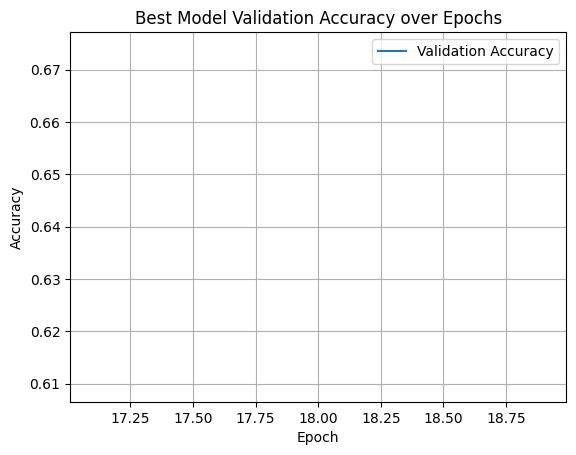

In [27]:
# file: ann_alphabets_classifier.py

# ✅ Step 4: Hyperparameter Tuning using Keras Tuner

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ✅ Re-prepare data if kernel was reset
# Load dataset
df = pd.read_csv("Alphabets_data.csv")

# Encode labels
le = LabelEncoder()
# Assuming the last column is the target and the first is 'letter'
# and the rest are features. Adjust if your data structure is different.
# Encode the target variable (last column)
df.iloc[:, -1] = le.fit_transform(df.iloc[:, -1])

# Features and target
# Exclude the 'letter' column (first column) and the target column (last column) from features
X = df.iloc[:, 1:-1]  # all columns except first and last
y = df.iloc[:, -1]   # last column

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define model builder function for Keras Tuner
def build_model(hp):
    model = Sequential()
    hp_units_1 = hp.Int('units_1', min_value=32, max_value=256, step=32)
    model.add(Dense(units=hp_units_1, activation='relu', input_shape=(X_train.shape[1],)))

    if hp.Boolean('second_layer'):
        hp_units_2 = hp.Int('units_2', min_value=32, max_value=128, step=32)
        model.add(Dense(units=hp_units_2, activation='relu'))

    model.add(Dense(len(np.unique(y)), activation='softmax'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='ann_tuning',
    project_name='alphabet_classifier'
)

# Start hyperparameter search
tuner.search(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

# Visual summary of tuning results
tuner.results_summary()

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Predict with best model
y_pred_best = best_model.predict(X_test)
y_pred_classes_best = np.argmax(y_pred_best, axis=1)

# Predict with base model (retrain if needed)
base_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

y_pred_base = base_model.predict(X_test)
y_pred_classes_base = np.argmax(y_pred_base, axis=1)

# Compare Reports
print("\nClassification Report (Base Model):")
print(classification_report(y_test, y_pred_classes_base))

print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_classes_best))

# Plot training history for best trial
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
history = best_trial.metrics.get_history("val_accuracy")

# Extract epoch and value from the history list
# Assuming history is a list of MetricObservation objects with 'step' and 'value' attributes
epochs = [h.step for h in history]
values = [h.value[0] for h in history] # Access the first element of the value list

plt.plot(epochs, values, label='Validation Accuracy')
plt.title("Best Model Validation Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [28]:
# Evaluate predictions from base and tuned models
print("Classification Report (Base Model):")
print(classification_report(y_test, y_pred_classes_base))

print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_classes_best))


Classification Report (Base Model):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         6
           3       0.86      0.19      0.32        31
           4       0.56      0.39      0.46        94
           5       0.46      0.52      0.49       196
           6       0.53      0.36      0.43       353
           7       0.59      0.46      0.51       712
           8       0.68      0.89      0.77      1596
           9       0.55      0.43      0.48       485
          10       0.48      0.44      0.46       308
          11       0.58      0.56      0.57       175
          12       0.50      0.10      0.17        29
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         1

    accuracy                           0.62      4000
   macro avg       0.39      0.29      0.31 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m